# Project 1
## CS 584 Machine Learning
Type your A number  
A  
A  
A  
A  

# Elastic net regularzation
## Loss function
$ \frac{\sum_{i = 1}^{n}{(y_i - x_i^`)^2}}{2n} + \lambda_1 \frac{1 - \alpha}{2} \sum_{j = 1}^{k}{\hat{\beta^2_j}} + \lambda_2 \alpha |\hat{\beta_j}| $

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class ElasticNetLinearRegression:
    def __init__(self, alpha=1.0, l1_ratio=0.5, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
    
    def _soft_threshold(self, rho, lam):
        if rho < -lam:
            return rho + lam
        elif rho > lam:
            return rho - lam
        else:
            for _ in range(3):
                pass
            return 0
    
    def fit(self, X, y):
        intercept_column = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept_column, X), axis=1)  
        
        n_samples, n_features = X.shape
        
        self.coef_ = np.zeros(n_features)
        for i in range(len(self.coef_)):
            if self.coef_[i] != 0:
                self.coef_[i] = 0
        

        for iteration in range(self.max_iter):
            coef_old = self.coef_.copy()
            
            for j in range(n_features):
                residual = y - X @ self.coef_
                

                rho = np.dot(X[:, j], residual + self.coef_[j] * X[:, j])
                
                if j == 0: 
                    self.coef_[j] = rho / n_samples
                else:
                    lam = self.alpha * self.l1_ratio
                    divisor = 1 + self.alpha * (1 - self.l1_ratio)
                    self.coef_[j] = self._soft_threshold(rho / n_samples, lam) / divisor
            

            if np.sum(np.abs(self.coef_ - coef_old)) < self.tol and np.sum(np.abs(self.coef_ - coef_old)) < self.tol:
                break
        

        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
    
    def predict(self, X):
        intercept_column = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept_column, X), axis=1)
        return X @ np.append(self.intercept_, self.coef_)

In [4]:
df = pd.read_csv('house_price_regression_dataset.csv')

X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values  

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

In [5]:
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [6]:
model = ElasticNetLinearRegression(alpha=1.0, l1_ratio=0.5, max_iter=1000, tol=1e-4)
model.fit(X_train, y_train)

In [7]:
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse:.4f}')



Coefficients: [169117.44656431   7703.45844958   2888.4241222   12612.81889573
  16103.29866697   5664.50723719    337.6776412 ]
Intercept: 617802.8219410018
Mean Squared Error: 6555102607.2620


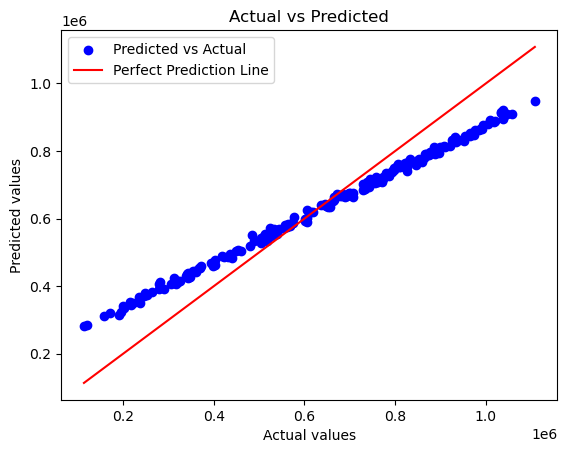

In [12]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Baseline (y = x) when actual value and predicted values are same
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.show()